###### About the Challenge:

##### Financial inclusion in Africa:

The challenge hosted by Zindi Africa Data science platform for Zindi_mentorship data scientist(#challenge1)
    
The challenge objective is about to develop the Machine Learning Model to  predict the likehood of people 

to have the bank account or not from data sets colleted based on east African countries.
    
The Evaluation metric of this challenge is error_rate(1 - accuracy_score)

######  Import Libraries

In [143]:
# import important modules 

## For Loading data
#
import pandas as pd

## For computational & statistical analysis
#
import numpy as np

## For Visualization 
#
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing Module
#
#TQDM is a progress bar library with good support for nested loops and Jupyter/IPython notebooks.

from tqdm import tqdm
import math
import gc
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.preprocessing import MinMaxScaler


## Modelling 
#
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, FeaturesData, Pool
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

## Model Evaluation
#
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##### Loading Data

In [53]:
train_df= pd.read_csv("../Train_v2.csv")
test_df = pd.read_csv("../Test_v2.csv")
sub = pd.read_csv("../SubmissionFile.csv")
variable_desc =pd.read_csv("../VariableDefinitions.csv")


In [54]:
# print shape 
print('train data shape :', train_df.shape)
print('test data shape :', test_df.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


In [55]:
# Inspect train Data
train_df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [56]:
# Inspect test Data
test_df.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


**Note:** Open the VariableDefinition file to understand the meaning of each variable in this dataset

In [57]:
# variable_desc

In [58]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,23524.0,2016.975939,0.847371,2016.0,2016.0,2017.0,2018.0,2018.0
household_size,23524.0,3.797483,2.227613,1.0,2.0,3.0,5.0,21.0
age_of_respondent,23524.0,38.805220,16.520569,16.0,26.0,35.0,49.0,100.0


In [59]:
#inspect informations of train datasets 

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


### Explolatory Data Analysis 

This is the process of finding some insights from you dataset before create predictive models.

- Lets make assumptions before:
    
    - People with mobile(cell_phone owners) likely to have no bank account, probably likely to use mobile money.
    
    - People located at Rural may lack bank account due to their Location.
    
    - How about the Age of respodents?
    
    - How about the gender of respondent? (male/Female)
    
    - How about job_type ? (Mostly of people with permanent job are likely to posses bank_account)
    
    - People with high education level are more likely to have bank account
    

From the Assumptions made , will guide to make better **EDA**

In [60]:
# Lets check train columns

train_df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [61]:
# lests check missing values (train set)

print('missing values:', train_df.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


In [62]:
# lests check missing values (test set)

print('missing values:', test_df.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


**No missing value from both train & test sets so Now I can go to Analysis**

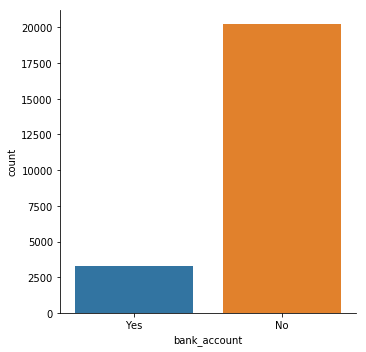

In [63]:
# Lets check Distribution of the target column

sns.catplot(x="bank_account", kind="count", data=train_df)

**From the graph tell that the target classes are not well balanced, more respondent has No bank_account**

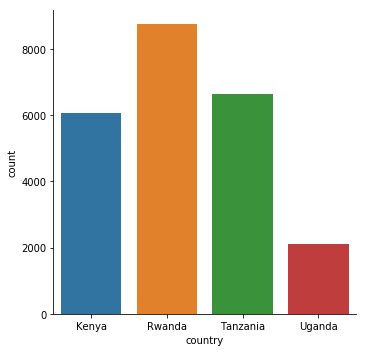

In [64]:
# Explore Country distribution 

sns.catplot(x="country", kind="count", data=train_df)

**Rwanda leads the number of respondent**

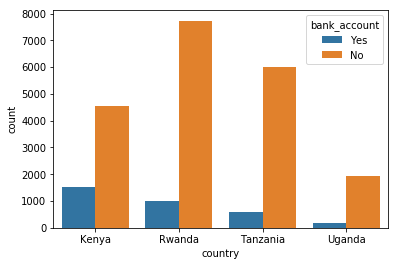

In [65]:
# Lets check Distribution of target  & country column

sns.countplot('country', hue= 'bank_account', data=train_df)

**Kenya, leads on respondent with bank account possessionfollowed by rwanda and Tanzania**

**Rwanda & Tanzania, leads on respondent with no bank account**

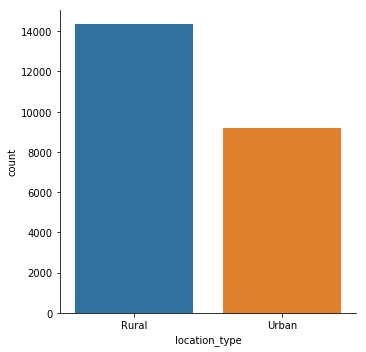

In [66]:
# Explore Location distribution 

sns.catplot(x="location_type", kind="count", data=train_df)

**Most of Respondent were from Rural compared to those located at Urban**

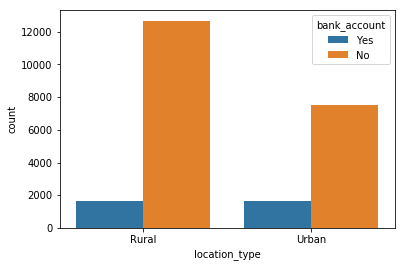

In [67]:
# Lets check Distribution of target  & location_type column

sns.countplot('location_type', hue= 'bank_account', data=train_df)

**Most of respondent located at Rural has no bank account compared to those at Urban**

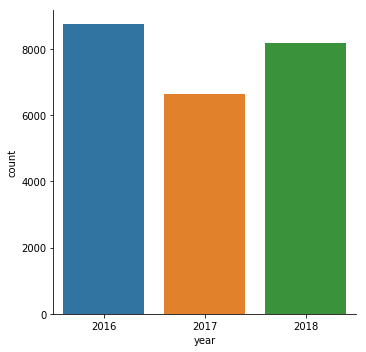

In [68]:
# Explore Years distribution 

sns.catplot(x="year", kind="count", data=train_df)

**Most of Data collected in 2016**

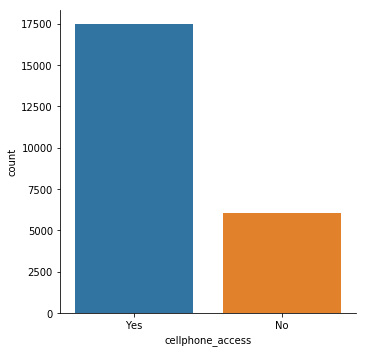

In [69]:
# Explore cellphone_access distribution 

sns.catplot(x="cellphone_access", kind="count", data=train_df)

**Most of the particiapants have access to the cellphone**

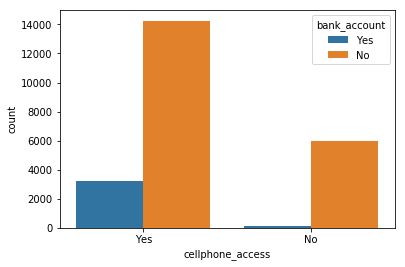

In [70]:
# Lets check Distribution of target  & cellphone_access column

sns.countplot('cellphone_access', hue= 'bank_account', data=train_df)

**Most of respondent with cellphone has no bank account**

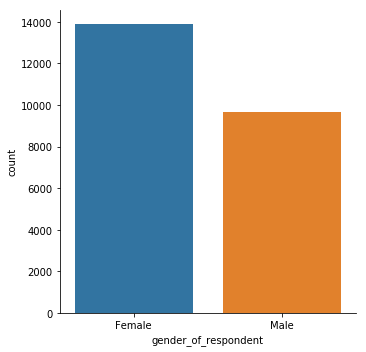

In [71]:
# Explore gender_of_respondents distribution 

sns.catplot(x="gender_of_respondent", kind="count", data=train_df)

**Most of Respondent were Female**

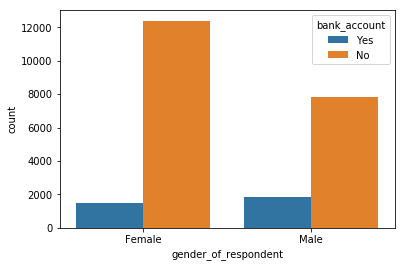

In [72]:
# Lets check Distribution of target  & gender_of_respondent column

sns.countplot('gender_of_respondent', hue= 'bank_account', data=train_df)

**Most of Female respondent has no Bank account compared to Male Respondent**

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

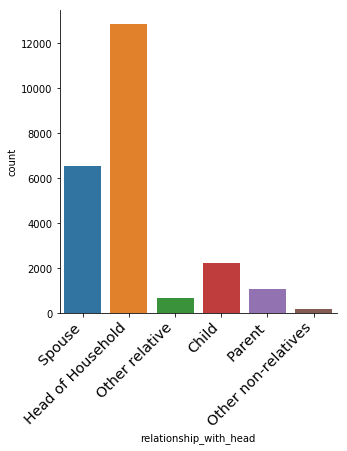

In [73]:
# Explore relationship_with_head distribution 

chart = sns.catplot(x="relationship_with_head", kind="count", data=train_df);

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

**We have more head of Household particants and few other non-relatives**

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

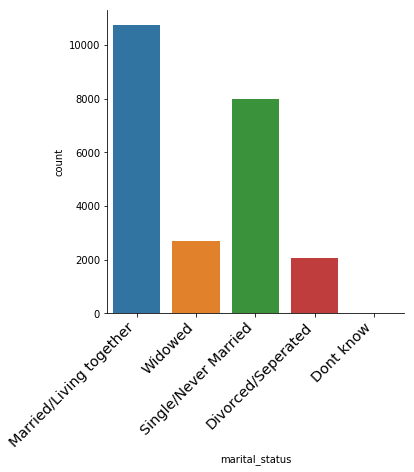

In [74]:

# Explore marital_status  distribution 

sns.catplot(x="marital_status", kind="count", data=train_df);

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

**Most of the participants are maried/living together**

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

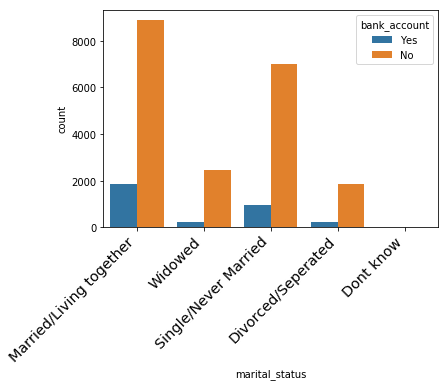

In [75]:
# Lets check Distribution of target  & marital_status column

sns.countplot('marital_status', hue= 'bank_account', data=train_df)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

**Most of Married/Living together posses bank account compared to others**

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

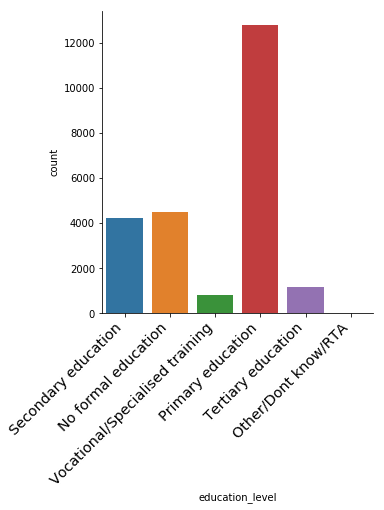

In [76]:
# Explore education_level  distribution 

sns.catplot(x="education_level", kind="count", data=train_df); 

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

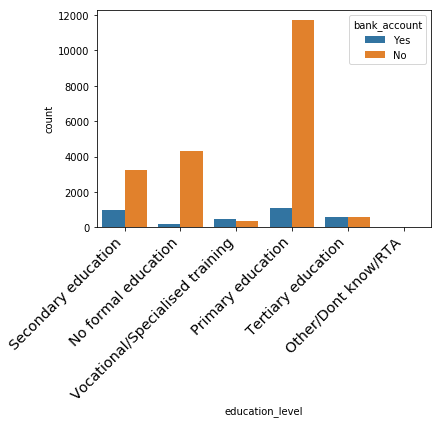

In [77]:
# Lets check Distribution of target  & education_level column

sns.countplot('education_level', hue= 'bank_account', data=train_df)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

**Most of Primary education respondents has no bank account**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

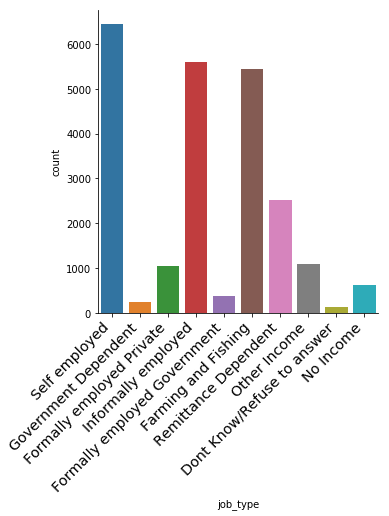

In [78]:
# Explore job_type distribution 

sns.catplot(x="job_type", kind="count", data=train_df); 

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
) 

**Most of Respondents were self employed**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

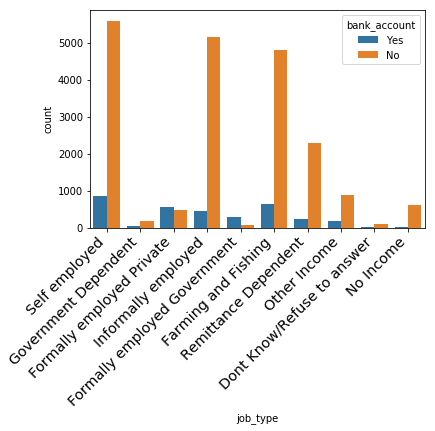

In [79]:
# Lets check Distribution of target  & job_type column

sns.countplot('job_type', hue= 'bank_account', data=train_df)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

**Most of Formally employed private has bank account**

**Most of self employed  has  no bank account**

Text(0.5, 0, 'Household  size')

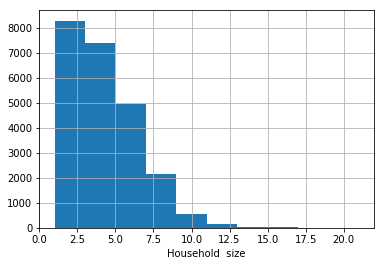

In [80]:
# Explore household_size distribution

train_df.household_size.hist() 
plt.xlabel('Household  size')

**Household_size is not normally distributed and the most common number of people living in the house is 2**

Text(0.5, 0, 'Age of Respondent')

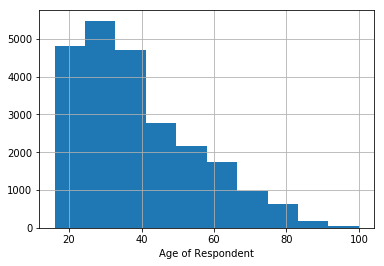

In [81]:
# Explore age_of_respondent distribution

train_df.age_of_respondent.hist() 
plt.xlabel('Age of Respondent')

**Most of the Respondent's age is between 20 and 35**

###### Data Processing

In [82]:
# Lets concate train_df and test_df to have few steps on processing our data

data = pd.concat([train_df,test_df],sort = False).reset_index(drop=True)

In [83]:
# preview data

data.sample(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
9822,Rwanda,2016,uniqueid_3755,Yes,Rural,Yes,7,35,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
18307,Tanzania,2017,uniqueid_3505,No,Urban,Yes,8,37,Female,Parent,Widowed,Primary education,Self employed
30981,Tanzania,2017,uniqueid_7732,NaN,Rural,Yes,3,50,Female,Spouse,Single/Never Married,Primary education,Informally employed
29256,Rwanda,2016,uniqueid_11867,NaN,Rural,Yes,7,44,Male,Head of Household,Married/Living together,No formal education,Farming and Fishing
1031,Kenya,2018,uniqueid_1032,No,Urban,Yes,4,20,Male,Child,Single/Never Married,Secondary education,Informally employed


In [84]:
# Lets check data types of columns

data.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

**Most of columns are categorical**

In [85]:
# convert categorical features to numerical features

data['country_'] = data['country']

categ = ['relationship_with_head', 'marital_status', 'education_level', 'job_type', 'country_']

# One Hot Encoding conversion

data = pd.get_dummies(data, prefix_sep='_', columns = categ)


# Labelncoder conversion

data['location_type'] = le.fit_transform(data['location_type'])
data['cellphone_access'] = le.fit_transform(data['cellphone_access'])
data['gender_of_respondent'] = le.fit_transform(data['gender_of_respondent'])
# data['bank_account'] = le.fit_transform(data['bank_account']) #due to some null values on test set so will covert after splitting our data


In [86]:
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,Kenya,2018,uniqueid_1,Yes,0,1,3,24,0,0,...,0,0,0,0,0,1,1,0,0,0
1,Kenya,2018,uniqueid_2,No,0,0,5,70,0,0,...,1,0,0,0,0,0,1,0,0,0
2,Kenya,2018,uniqueid_3,Yes,1,1,5,26,1,0,...,0,0,0,0,0,1,1,0,0,0
3,Kenya,2018,uniqueid_4,No,0,1,5,34,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Kenya,2018,uniqueid_5,No,1,0,8,26,1,1,...,0,1,0,0,0,0,1,0,0,0


In [87]:
# generate new columns

feat = ["household_size","age_of_respondent"]

In [88]:
#function to generate aggregation of  feat columns

def aggregate_feat(y,col_name):
    y["max_"+col_name]=y[col_name].apply(np.max)
    y["min_"+col_name]=y[col_name].apply(np.min)
    y["mean_"+col_name]=y[col_name].apply(np.mean)
    y["std_"+col_name]=y[col_name].apply(np.std)
    y["var_"+col_name]=y[col_name].apply(np.var)
    y["median_"+col_name]=y[col_name].apply(np.median)
    return y

In [89]:
for col_name in tqdm(feat):
    data=aggregate_feat(data,col_name)

100%|██████████| 2/2 [00:13<00:00,  6.94s/it]


In [91]:
# Lets check the shape of our data

data.shape

(33610, 52)

In [92]:
# splliting data into train and test sets

train = data[data.bank_account.notnull()].reset_index(drop=True)
test = data[data.bank_account.isna()].reset_index(drop=True)

In [93]:
train.shape , test.shape

((23524, 52), (10086, 52))

In [94]:
# Lets convert our target into Numerical values

train['bank_account'] = le.fit_transform(train['bank_account'])

###### Feature Selection

In [95]:
# Separate training features from target

feat_cols = train.drop(['year', 'uniqueid', 'bank_account', 'country',"household_size","age_of_respondent"], axis=1)

target = train['bank_account']

cols = feat_cols.columns

In [96]:
train[cols].shape , target.shape

((23524, 46), (23524,))

In [97]:
# rescale train features and test features

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_rescaled = scaler.fit_transform(train[cols])
X_test_rescaled = scaler.fit_transform(test[cols])

In [108]:
# setting no. of seed for reproduciability

SEED = 42

In [131]:
# splitting data for training Models and evaluation

X_train, X_test, y_train, y_test = train_test_split(X_train_rescaled, target, stratify = target, test_size = 0.2, random_state = SEED)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(18819, 46) (18819,)
(4705, 46) (4705,)


#####  Extreme Gradient Booost

In [156]:
# fit and Evaluate model

model0 = XGBClassifier(learning_rate = 0.1, min_child_weight = 5, gamma = 0.5, subsample = 0.6, colsample_bytree = 0.6, max_depth = 5)

model0.fit(X_train, y_train)

y_pred = model0.predict(X_test)

# Get error rate

print("Error rate of Extreme Gradient Boost classifier: ", 1 - accuracy_score(y_test, y_pred))

# Get the predicted result for the test data

pred0 = model0.predict(X_test_rescaled)

Error rate of Extreme Gradient Boost classifier:  0.10903294367693939


##### CatBoost 

In [157]:
#create model

model1 = CatBoostClassifier(iterations=1000, learning_rate=0.01, depth=9)

# Fit model

model1.fit(X_train,y_train)


# Get predictions

preds = model1.predict(X_test)

# Get error rate

print("Error rate of CatBoost classifier: ", 1 - accuracy_score(y_test, preds))

# Get the predicted result for the test data

pred1 = model1.predict(X_test_rescaled)

0:	learn: 0.6824676	total: 35ms	remaining: 34.9s
1:	learn: 0.6721232	total: 68.5ms	remaining: 34.2s
2:	learn: 0.6611420	total: 104ms	remaining: 34.6s
3:	learn: 0.6505252	total: 138ms	remaining: 34.4s
4:	learn: 0.6409706	total: 171ms	remaining: 34s
5:	learn: 0.6305622	total: 205ms	remaining: 34s
6:	learn: 0.6217328	total: 243ms	remaining: 34.4s
7:	learn: 0.6152653	total: 261ms	remaining: 32.3s
8:	learn: 0.6079198	total: 304ms	remaining: 33.5s
9:	learn: 0.6017828	total: 317ms	remaining: 31.4s
10:	learn: 0.5936771	total: 351ms	remaining: 31.5s
11:	learn: 0.5863614	total: 386ms	remaining: 31.8s
12:	learn: 0.5783585	total: 419ms	remaining: 31.8s
13:	learn: 0.5712034	total: 476ms	remaining: 33.5s
14:	learn: 0.5637953	total: 522ms	remaining: 34.2s
15:	learn: 0.5565750	total: 557ms	remaining: 34.3s
16:	learn: 0.5504976	total: 590ms	remaining: 34.1s
17:	learn: 0.5440348	total: 625ms	remaining: 34.1s
18:	learn: 0.5378413	total: 658ms	remaining: 34s
19:	learn: 0.5311011	total: 696ms	remaining: 34

164:	learn: 0.2920074	total: 6.93s	remaining: 35.1s
165:	learn: 0.2916891	total: 7s	remaining: 35.2s
166:	learn: 0.2914478	total: 7.04s	remaining: 35.1s
167:	learn: 0.2911286	total: 7.09s	remaining: 35.1s
168:	learn: 0.2908388	total: 7.15s	remaining: 35.1s
169:	learn: 0.2904402	total: 7.21s	remaining: 35.2s
170:	learn: 0.2901327	total: 7.26s	remaining: 35.2s
171:	learn: 0.2898740	total: 7.31s	remaining: 35.2s
172:	learn: 0.2895200	total: 7.35s	remaining: 35.1s
173:	learn: 0.2892416	total: 7.41s	remaining: 35.2s
174:	learn: 0.2889148	total: 7.45s	remaining: 35.1s
175:	learn: 0.2887220	total: 7.5s	remaining: 35.1s
176:	learn: 0.2883987	total: 7.54s	remaining: 35.1s
177:	learn: 0.2881246	total: 7.6s	remaining: 35.1s
178:	learn: 0.2877659	total: 7.65s	remaining: 35.1s
179:	learn: 0.2874082	total: 7.71s	remaining: 35.1s
180:	learn: 0.2870940	total: 7.75s	remaining: 35.1s
181:	learn: 0.2868272	total: 7.81s	remaining: 35.1s
182:	learn: 0.2866386	total: 7.84s	remaining: 35s
183:	learn: 0.28638

324:	learn: 0.2651655	total: 14.8s	remaining: 30.8s
325:	learn: 0.2650884	total: 14.9s	remaining: 30.8s
326:	learn: 0.2650467	total: 14.9s	remaining: 30.7s
327:	learn: 0.2649771	total: 15s	remaining: 30.6s
328:	learn: 0.2649244	total: 15s	remaining: 30.5s
329:	learn: 0.2648674	total: 15s	remaining: 30.5s
330:	learn: 0.2647941	total: 15.1s	remaining: 30.4s
331:	learn: 0.2647190	total: 15.1s	remaining: 30.4s
332:	learn: 0.2646306	total: 15.1s	remaining: 30.3s
333:	learn: 0.2645823	total: 15.2s	remaining: 30.3s
334:	learn: 0.2645094	total: 15.2s	remaining: 30.2s
335:	learn: 0.2644386	total: 15.2s	remaining: 30.1s
336:	learn: 0.2643737	total: 15.3s	remaining: 30.1s
337:	learn: 0.2642455	total: 15.4s	remaining: 30.1s
338:	learn: 0.2641993	total: 15.4s	remaining: 30.1s
339:	learn: 0.2641394	total: 15.5s	remaining: 30s
340:	learn: 0.2640879	total: 15.5s	remaining: 29.9s
341:	learn: 0.2639986	total: 15.5s	remaining: 29.9s
342:	learn: 0.2639150	total: 15.6s	remaining: 29.9s
343:	learn: 0.263868

485:	learn: 0.2554710	total: 22.2s	remaining: 23.5s
486:	learn: 0.2554380	total: 22.3s	remaining: 23.5s
487:	learn: 0.2554193	total: 22.3s	remaining: 23.4s
488:	learn: 0.2553808	total: 22.4s	remaining: 23.4s
489:	learn: 0.2553268	total: 22.4s	remaining: 23.3s
490:	learn: 0.2552648	total: 22.5s	remaining: 23.3s
491:	learn: 0.2551992	total: 22.5s	remaining: 23.3s
492:	learn: 0.2551478	total: 22.6s	remaining: 23.2s
493:	learn: 0.2550798	total: 22.6s	remaining: 23.1s
494:	learn: 0.2550208	total: 22.6s	remaining: 23.1s
495:	learn: 0.2549749	total: 22.7s	remaining: 23s
496:	learn: 0.2549152	total: 22.7s	remaining: 23s
497:	learn: 0.2548794	total: 22.8s	remaining: 22.9s
498:	learn: 0.2548009	total: 22.8s	remaining: 22.9s
499:	learn: 0.2547420	total: 22.8s	remaining: 22.8s
500:	learn: 0.2546872	total: 22.9s	remaining: 22.8s
501:	learn: 0.2546415	total: 22.9s	remaining: 22.7s
502:	learn: 0.2545717	total: 23s	remaining: 22.7s
503:	learn: 0.2545429	total: 23s	remaining: 22.6s
504:	learn: 0.254472

648:	learn: 0.2479965	total: 28.8s	remaining: 15.6s
649:	learn: 0.2479733	total: 28.9s	remaining: 15.6s
650:	learn: 0.2479413	total: 28.9s	remaining: 15.5s
651:	learn: 0.2478870	total: 29s	remaining: 15.5s
652:	learn: 0.2478667	total: 29s	remaining: 15.4s
653:	learn: 0.2478282	total: 29s	remaining: 15.4s
654:	learn: 0.2477823	total: 29.1s	remaining: 15.3s
655:	learn: 0.2477499	total: 29.1s	remaining: 15.3s
656:	learn: 0.2477469	total: 29.1s	remaining: 15.2s
657:	learn: 0.2477044	total: 29.2s	remaining: 15.2s
658:	learn: 0.2476755	total: 29.2s	remaining: 15.1s
659:	learn: 0.2476362	total: 29.2s	remaining: 15.1s
660:	learn: 0.2476063	total: 29.3s	remaining: 15s
661:	learn: 0.2475923	total: 29.3s	remaining: 15s
662:	learn: 0.2475661	total: 29.4s	remaining: 14.9s
663:	learn: 0.2475458	total: 29.5s	remaining: 14.9s
664:	learn: 0.2475345	total: 29.5s	remaining: 14.9s
665:	learn: 0.2475009	total: 29.6s	remaining: 14.8s
666:	learn: 0.2474655	total: 29.7s	remaining: 14.8s
667:	learn: 0.2474304	

811:	learn: 0.2418408	total: 35.8s	remaining: 8.29s
812:	learn: 0.2417980	total: 35.8s	remaining: 8.24s
813:	learn: 0.2417504	total: 35.9s	remaining: 8.2s
814:	learn: 0.2417096	total: 35.9s	remaining: 8.16s
815:	learn: 0.2416820	total: 36s	remaining: 8.11s
816:	learn: 0.2416549	total: 36s	remaining: 8.07s
817:	learn: 0.2416090	total: 36.1s	remaining: 8.03s
818:	learn: 0.2415930	total: 36.1s	remaining: 7.99s
819:	learn: 0.2415736	total: 36.2s	remaining: 7.94s
820:	learn: 0.2415627	total: 36.2s	remaining: 7.89s
821:	learn: 0.2415395	total: 36.2s	remaining: 7.85s
822:	learn: 0.2415028	total: 36.3s	remaining: 7.8s
823:	learn: 0.2414520	total: 36.3s	remaining: 7.76s
824:	learn: 0.2414288	total: 36.4s	remaining: 7.72s
825:	learn: 0.2413613	total: 36.4s	remaining: 7.67s
826:	learn: 0.2413148	total: 36.5s	remaining: 7.63s
827:	learn: 0.2412818	total: 36.5s	remaining: 7.59s
828:	learn: 0.2412491	total: 36.6s	remaining: 7.54s
829:	learn: 0.2412084	total: 36.6s	remaining: 7.5s
830:	learn: 0.24115

971:	learn: 0.2358899	total: 42.9s	remaining: 1.24s
972:	learn: 0.2358228	total: 43s	remaining: 1.19s
973:	learn: 0.2357953	total: 43s	remaining: 1.15s
974:	learn: 0.2357468	total: 43.1s	remaining: 1.1s
975:	learn: 0.2356685	total: 43.1s	remaining: 1.06s
976:	learn: 0.2356459	total: 43.1s	remaining: 1.01s
977:	learn: 0.2356061	total: 43.2s	remaining: 972ms
978:	learn: 0.2355654	total: 43.3s	remaining: 928ms
979:	learn: 0.2355307	total: 43.3s	remaining: 884ms
980:	learn: 0.2354965	total: 43.3s	remaining: 839ms
981:	learn: 0.2354653	total: 43.4s	remaining: 795ms
982:	learn: 0.2354331	total: 43.4s	remaining: 751ms
983:	learn: 0.2354167	total: 43.5s	remaining: 707ms
984:	learn: 0.2353893	total: 43.5s	remaining: 663ms
985:	learn: 0.2353639	total: 43.5s	remaining: 618ms
986:	learn: 0.2353160	total: 43.6s	remaining: 574ms
987:	learn: 0.2353006	total: 43.6s	remaining: 530ms
988:	learn: 0.2352698	total: 43.7s	remaining: 486ms
989:	learn: 0.2352120	total: 43.7s	remaining: 442ms
990:	learn: 0.235

#####  Weighted Average

In [158]:
finalpred=(pred0*0.6+pred1*0.4)

In [159]:
test_df.bank_account = finalpred

In [160]:
# create submission DataFrame

submission = pd.DataFrame({"uniqueid": test_df["uniqueid"] + " x " + test_df["country"],"bank_account": test_df.bank_account})

In [161]:
# Create submission csv file

filename = 'my_submission.csv'

submission.to_csv(filename,index=False)